In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#local
from include_package import Welcome_party
Welcome_party().initialize()
from dlc_iteration import dlc_db
from fig_1_visualization_config import visual_config

vis_config=visual_config()


['c:\\MachineShop\\CSM_paper', 'c:\\MachineShop\\CSM_paper\\data', 'c:\\MachineShop\\CSM_paper\\Figure_1', 'c:\\MachineShop\\CSM_paper\\Figure_2', 'c:\\MachineShop\\CSM_paper\\utils']
c:\MachineShop\CSM_paper
c:\MachineShop\CSM_paper\data
c:\MachineShop\CSM_paper\Figure_1
c:\MachineShop\CSM_paper\Figure_2
c:\MachineShop\CSM_paper\utils


In [17]:
db=dlc_db()
targs=['LID', 'SKF', 'SUM']
db.select_treatment(targets=targs)
means_df=[]



for the_ky in db.keys:
    
    i=0
    while i<len(db.t_ps):
        t_point=db.t_ps[i]
        
        
        try:
            db.get_animal(the_ky, db.t_ps[i])
            means_df.append((np.mean(db.main_ar()), np.mean(db.mid_head_angs_atan()), np.mean(db.rot_speed()), 
                         np.mean(db.translation()),int(t_point), the_ky, db.treatment))
        except:
            print(the_ky+'missing'+t_point)
        i+=1
        


observ_df=pd.DataFrame(means_df, columns=['mean_R', 'mean_phi', 'mean_rot_speed', 'mean_trans.', 
                                          'time', 'animal', 'treatment'])
observ_df.replace({'treatment' : { 'SKF' : 'D1Ag',  'SUM' :'D2Ag',
                            'LID':'LD-3mg', 'D1A':'D1Ant', 'D2A':'D2Ant' }}, inplace=True)
observ_df.head()

17_SKFmissing80


<Axes: xlabel='time', ylabel='mean_phi'>

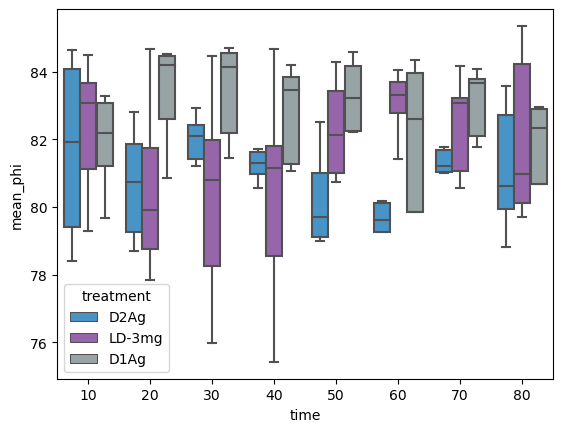

In [21]:
sns.boxplot(x='time', y='mean_phi', hue='treatment', data=observ_df, showfliers=False)

<Axes: xlabel='time', ylabel='mean_R'>

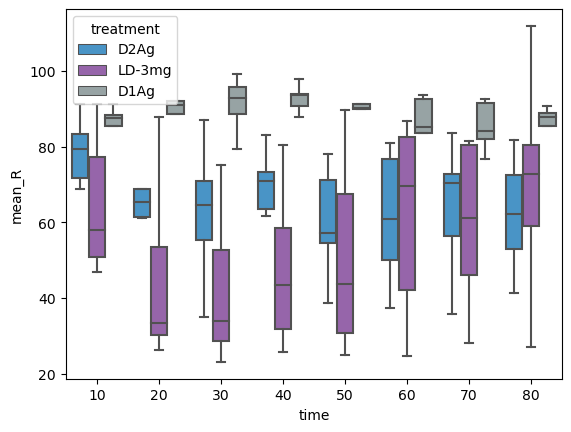

In [23]:
sns.boxplot(x='time', y='mean_R', hue='treatment', data=observ_df, showfliers=False)

<Axes: xlabel='time', ylabel='mean_rot_speed'>

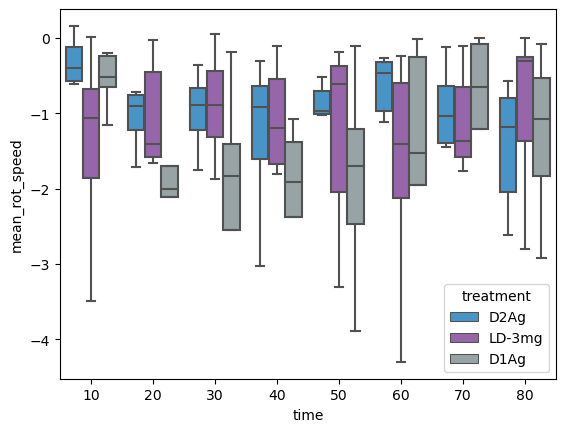

In [24]:
sns.boxplot(x='time', y='mean_rot_speed', hue='treatment', data=observ_df, showfliers=False)

<Axes: xlabel='time', ylabel='mean_trans.'>

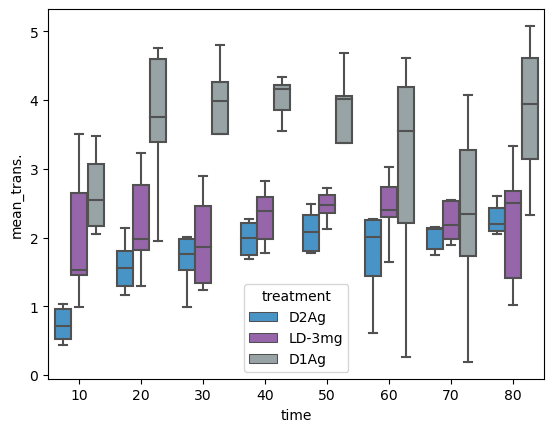

In [25]:
sns.boxplot(x='time', y='mean_trans.', hue='treatment', data=observ_df, showfliers=False)